Text(0.5, 1.0, 'Whitebalanced Image')

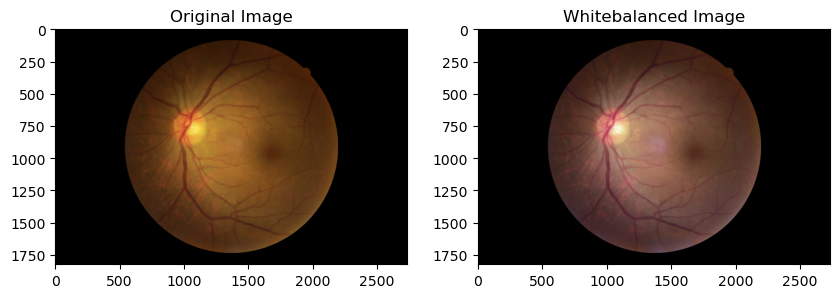

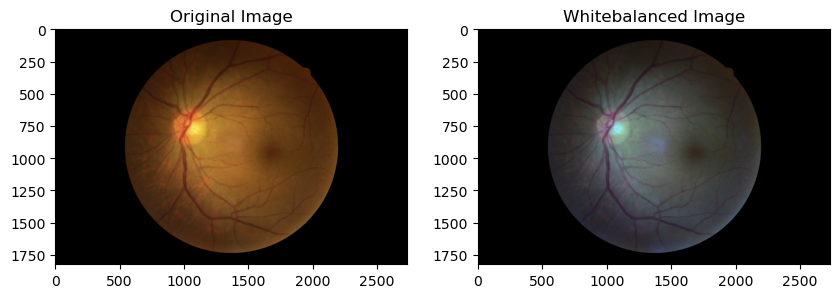

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import img_as_ubyte
from matplotlib.patches import Rectangle

image = imread('../data/image_1.jpg')

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
image_max = (image*1.0 / image.max(axis=(0,1)))
ax[1].imshow(image_max)
ax[1].set_title('Whitebalanced Image')

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
image_gw = ((image * (image.mean() / image.mean(axis=(0, 1)))).clip(0, 255).astype(int))
ax[1].imshow(image_gw)
ax[1].set_title('Whitebalanced Image')